In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load dataset
data = pd.read_csv('Customers.csv')

In [3]:
# Select relevant features and rename columns for simplicity
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
data = data.rename(columns={'Annual Income (k$)': 'income', 'Spending Score (1-100)': 'score'})

In [4]:
# Apply Agglomerative Clustering
model_agg = AgglomerativeClustering(n_clusters=5, linkage='ward')
data['cluster_agg'] = model_agg.fit_predict(data[['income', 'score']])


In [5]:
# Compute Silhouette Score
sil_score_agg = silhouette_score(data[['income', 'score']], data['cluster_agg'])
print(f'Silhouette Score for Agglomerative Clustering: {sil_score_agg}')

Silhouette Score for Agglomerative Clustering: 0.5529945955148897


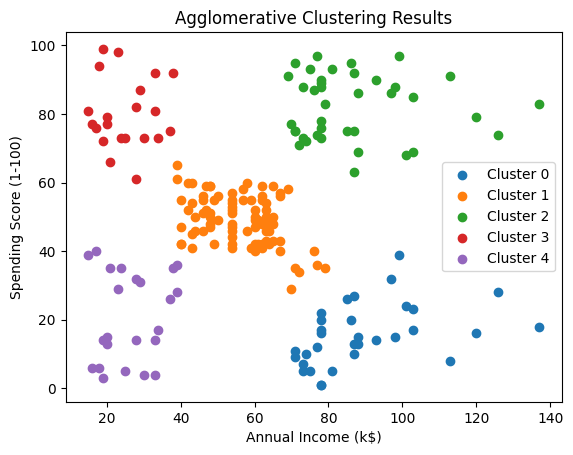

In [6]:
# Visualize clustered data
for i in range(5):
    cluster = data[data['cluster_agg'] == i]
    plt.scatter(cluster['income'], cluster['score'], label=f'Cluster {i}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Agglomerative Clustering Results')
plt.legend()
plt.show()

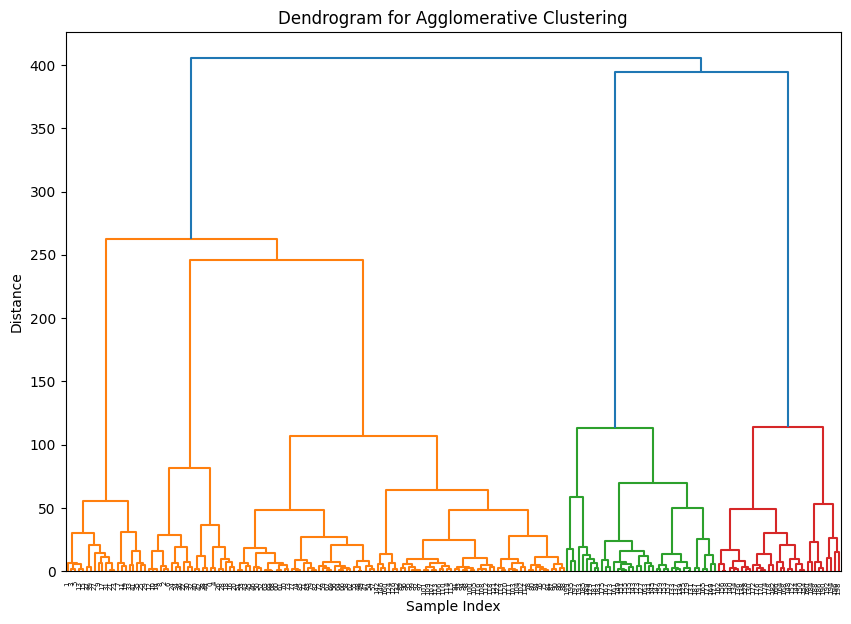

In [7]:
# Plot dendrogram to visualize hierarchical clustering
Z = linkage(data[['income', 'score']], method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()